Weight Decay

In [1]:
"""Weight decay is one of the regularization techniques"""
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
""" 
y = 0.05 + ∑_(i=1) ^(d) * (0.01 * x_i) + ϵ where ϵ ~ N(0, 0.01 ** 2)
Generate training data and validation data
"""
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5 # 20 training samples, 100 validation samples
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05 # all one vector with shape (200, 1), 0.01 is the weight, 0.05 is the bias
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [3]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True) # shape = (200, 1)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2 # torch.sum(w ** 2) / 2

In [5]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(
        xlabel='epochs',
        ylabel='loss',
        yscale='log',
        xlim=[5, num_epochs],
        legend=['train', 'test']
    )
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                l = loss(net(X), y) + lambd * l2_penalty(w) # The key to achieve weight decay = lambd * l2_penalty(w)
            l.sum().backward() # Compute gradients
            d2l.sgd([w, b], lr, batch_size) # Update parameters
        if (epoch + 1) % 5 == 0:
            animator.add(
                epoch + 1,
                (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss))
            )
    print('The L2 of w: ', torch.norm(w).item())

The L2 of w:  13.391668319702148


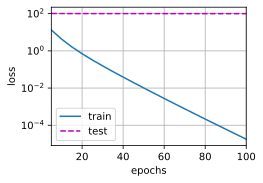

In [6]:
"""No weight decay (no regularization)"""
train(lambd=0)

The L2 of w:  0.39335620403289795


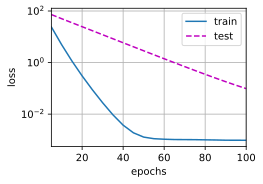

In [7]:
train(lambd=3)

The L2 of w:  0.03352809324860573


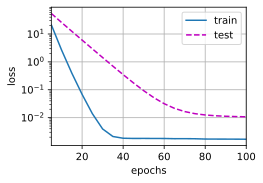

In [8]:
train(lambd=6)

The L2 of w:  0.024601571261882782


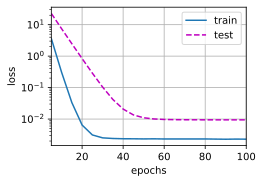

In [9]:
train(lambd=9)

The L2 of w:  0.020892176777124405


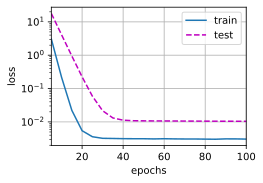

In [10]:
train(lambd=12)

The L2 of w:  0.020252680405974388


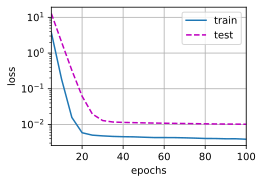

In [11]:
train(lambd=15)

The L2 of w:  0.016742698848247528


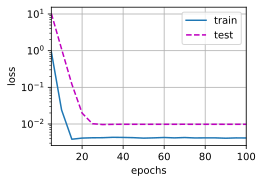

In [12]:
train(lambd=18)

In [13]:
def train_concise(wd):
    net = nn.Sequential(
        nn.Linear(num_inputs, 1)
    )
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD(
        [{
            'params': net[0].weight,
            'weight_decay': wd
        }, {
            'params': net[0].bias
        }],
        lr=lr
    )
    animator = d2l.Animator(
        xlabel='epochs',
        ylabel='loss',
        yscale='log',
        xlim=[5, num_epochs],
        legend=['train', 'test']
    )
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(
                epoch + 1,
                (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss))
            )
    print('The L2 of w: ', net[0].weight.norm().item())

The L2 of w:  13.692892074584961


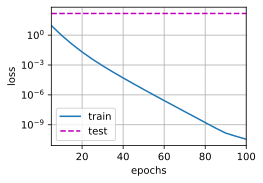

In [14]:
train_concise(0)

The L2 of w:  0.36765536665916443


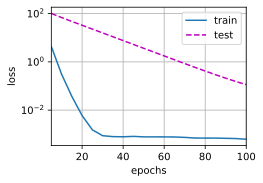

In [15]:
train_concise(3)

The L2 of w:  0.12334304302930832


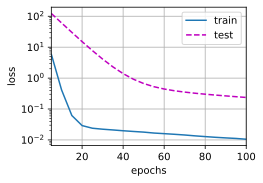

In [16]:
train_concise(6)